## Problem 0: Path follower implementation
In `chap10.path_follower.py` implement the following two functions
* `follow_straight_line(...)`
* `follow_orbit(...)`

A few notes on implementation:
* Ensure to populate the entire autopilot command for each function
* Use the `wrap(...)` function as appropriate
* Only return a non-zero roll feed forward term for the circular orbit when $\frac{d-\rho}{\rho} < 10$
* Calculate the roll feed forward term assuming no wind

In [1]:
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap10.run_sim import run_sim
from mav_sim.message_types.msg_path import MsgPath
from mav_sim.message_types.msg_state import MsgState
from mav_sim.message_types.msg_sim_params import MsgSimParams
from typing import Callable

from mav_sim.chap10.path_viewer import PathViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if 'path_view' not in globals():
    print("Initializing mav_view")
    global path_view
    path_view = PathViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

# Initialize the simulation parameters
sim_params_default = MsgSimParams(end_time=50., video_name="cha10.avi") # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(path_fnc: Callable[ [float, MsgState], MsgPath], sim_params: MsgSimParams = sim_params_default):
    global path_view
    global data_view
    data_view.reset(sim_params.start_time)
    (path_view, data_view) = run_sim(sim=sim_params, path_fnc=path_fnc, init_state=state, path_view=path_view, data_view=data_view) 
    display_data_view(data_view)
    display_mav_view(path_view)

Initializing mav_view
Initializing data_view


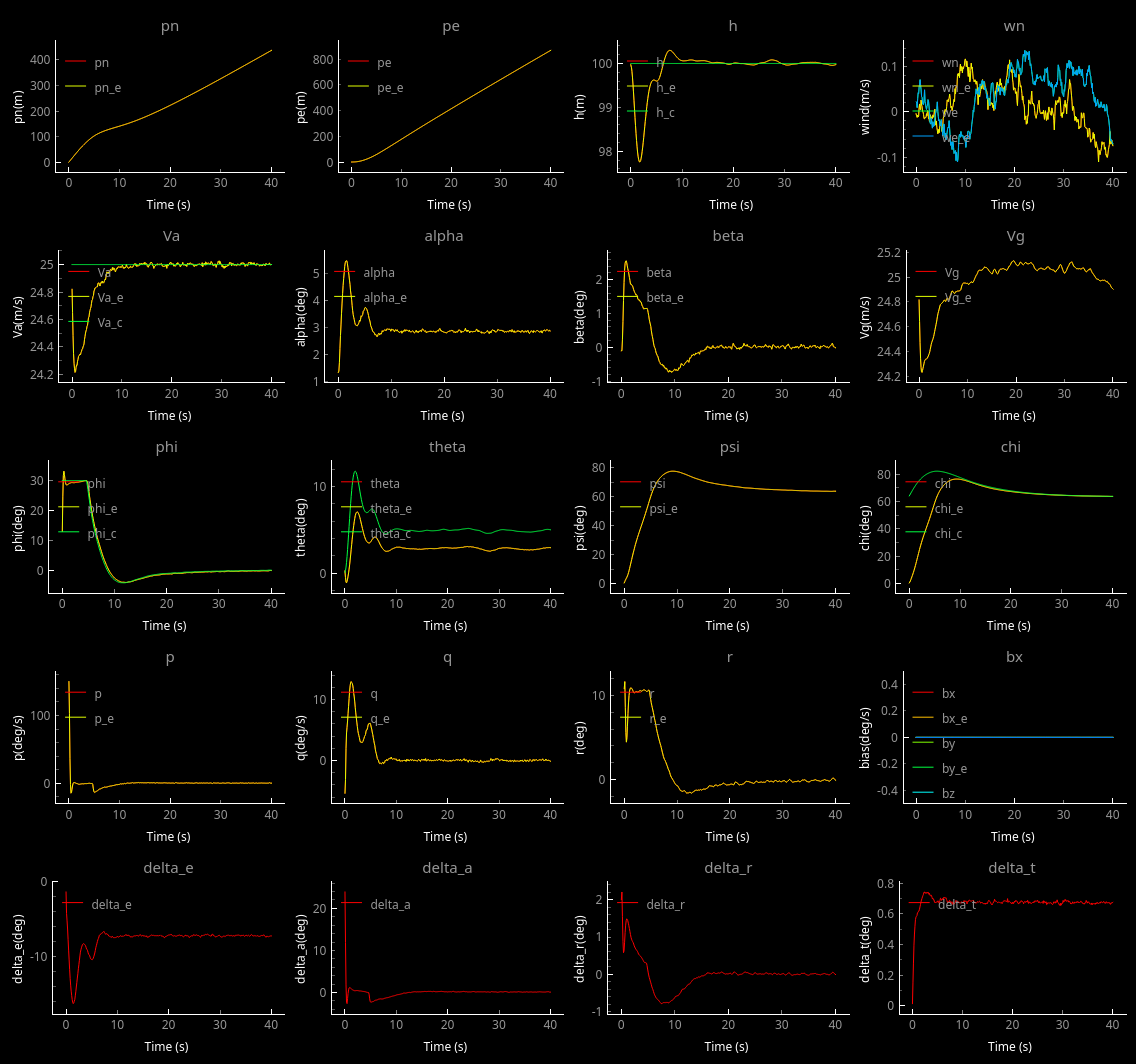

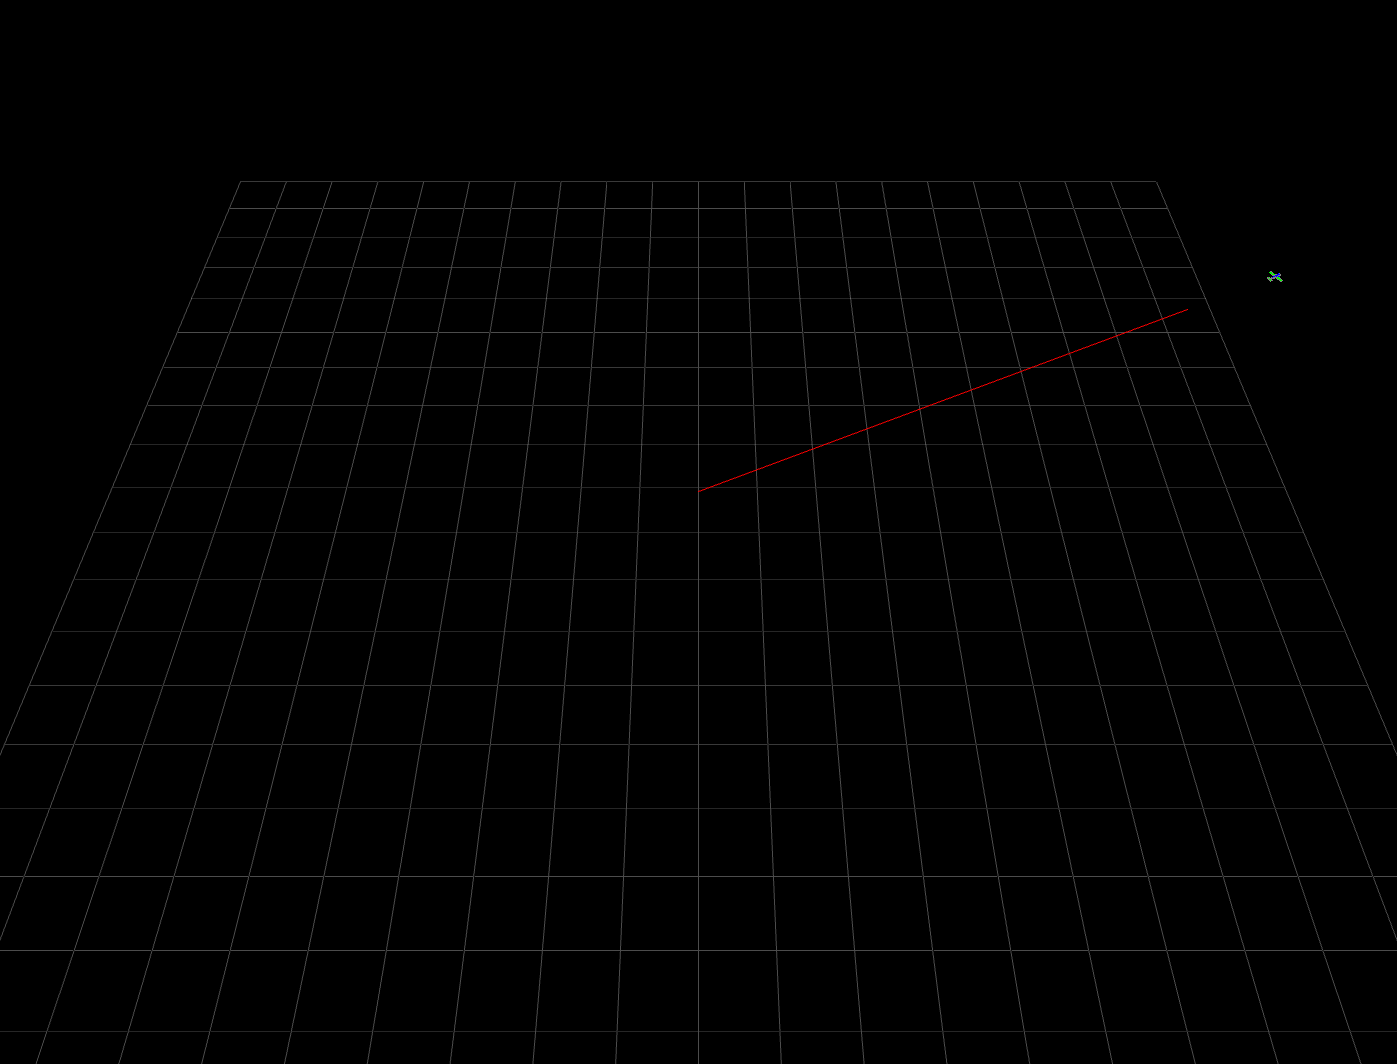

In [2]:
# path definition
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 0.0, -100.0]]).T
path.line_direction = np.array([[0.5, 1.0, 0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 1: Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 20 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}50 \\ 10 \\ -100 \end{bmatrix}$

### Describe the results
(Place answer here)

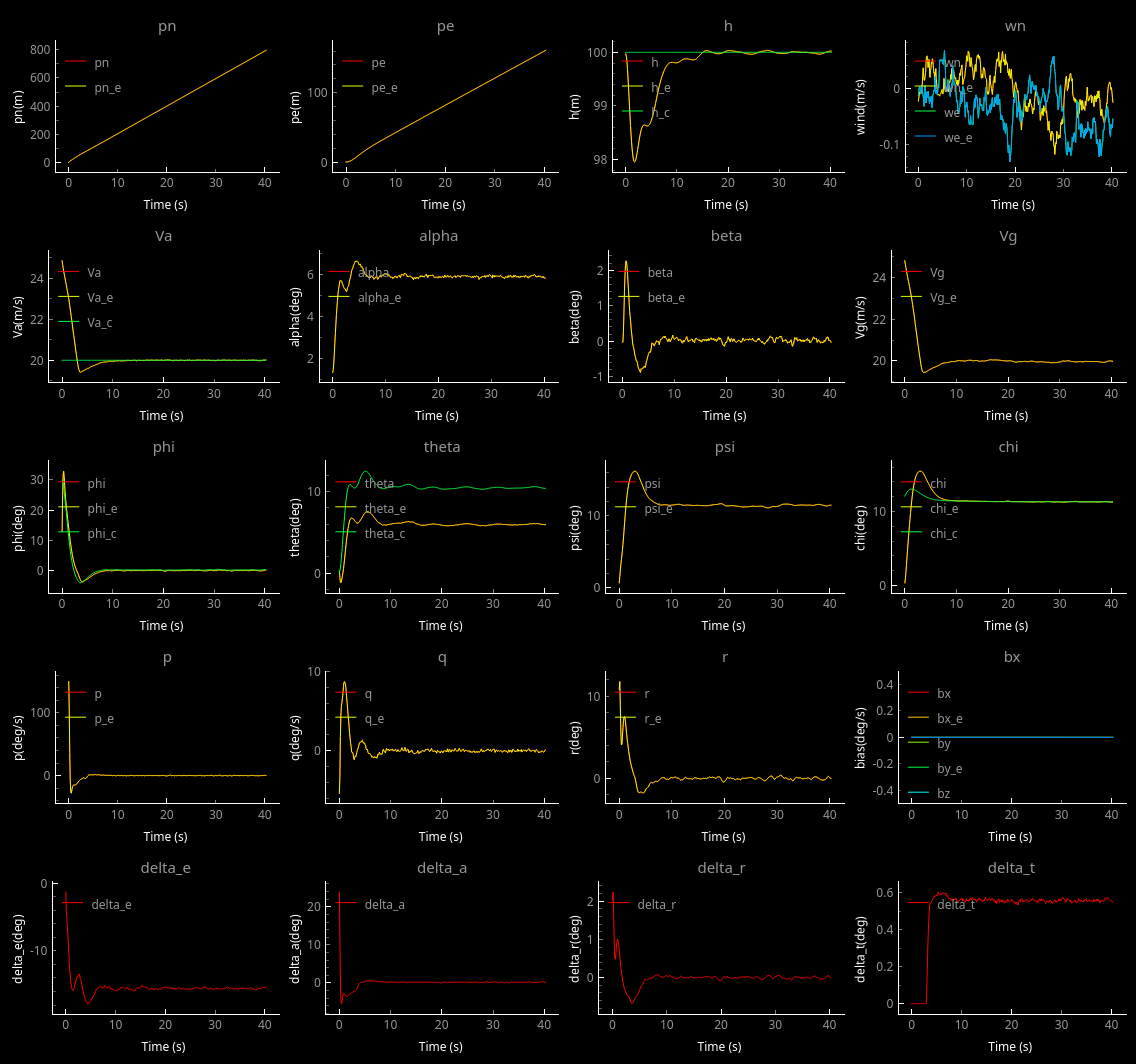

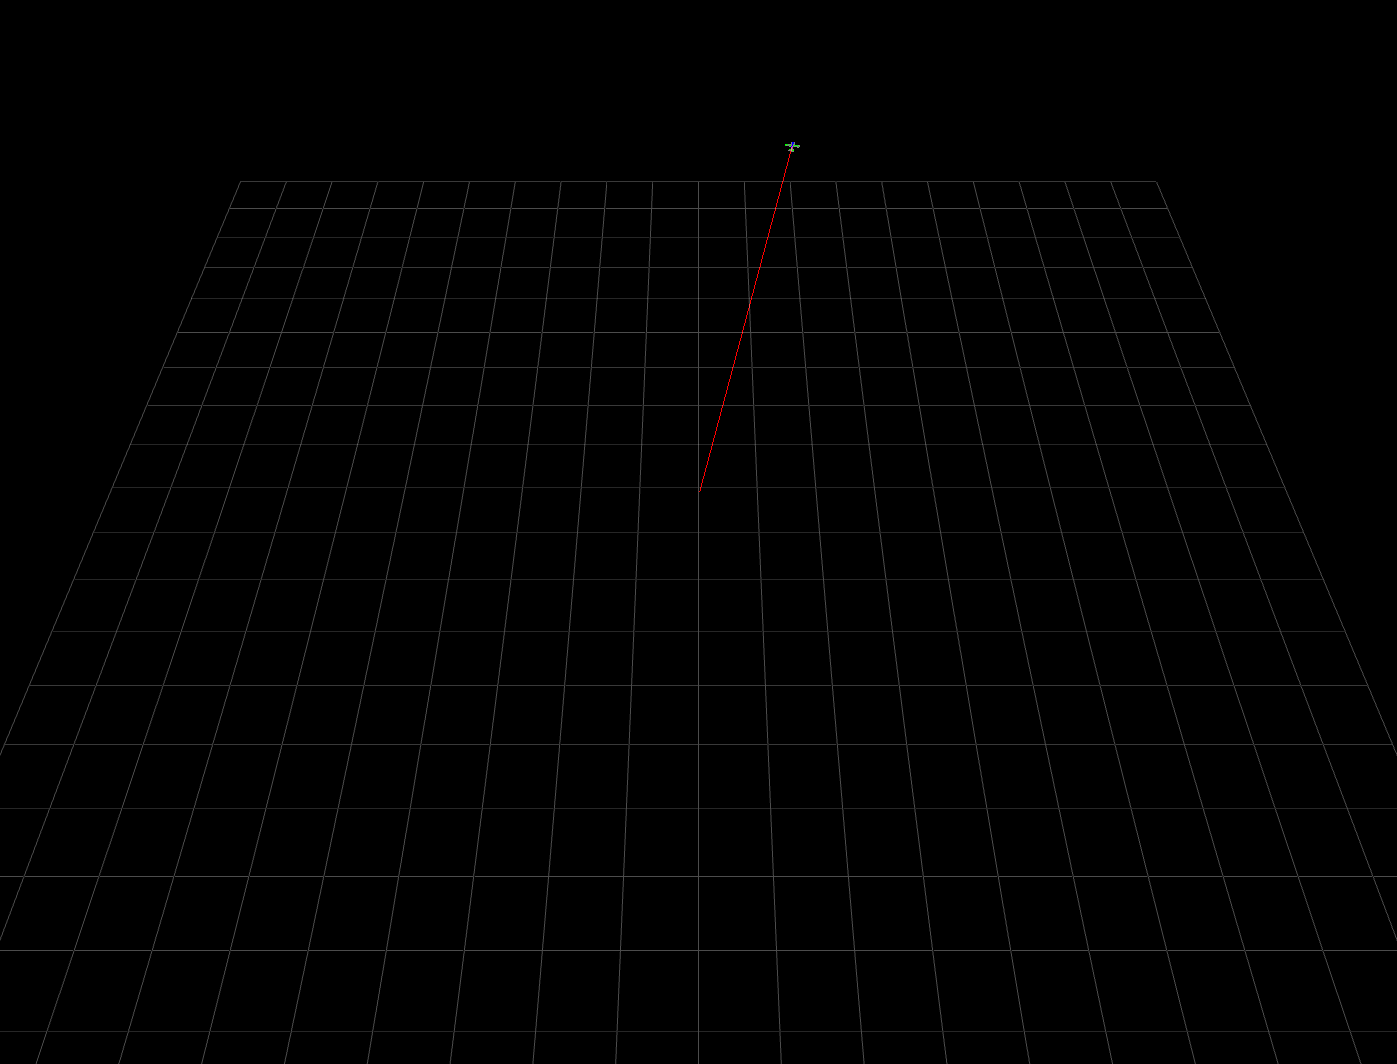

In [3]:
# path definition'
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[50.0, 10.0, 0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=20

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 2: Near-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -150 \end{bmatrix}$

### Describe the results
(Place answer here)

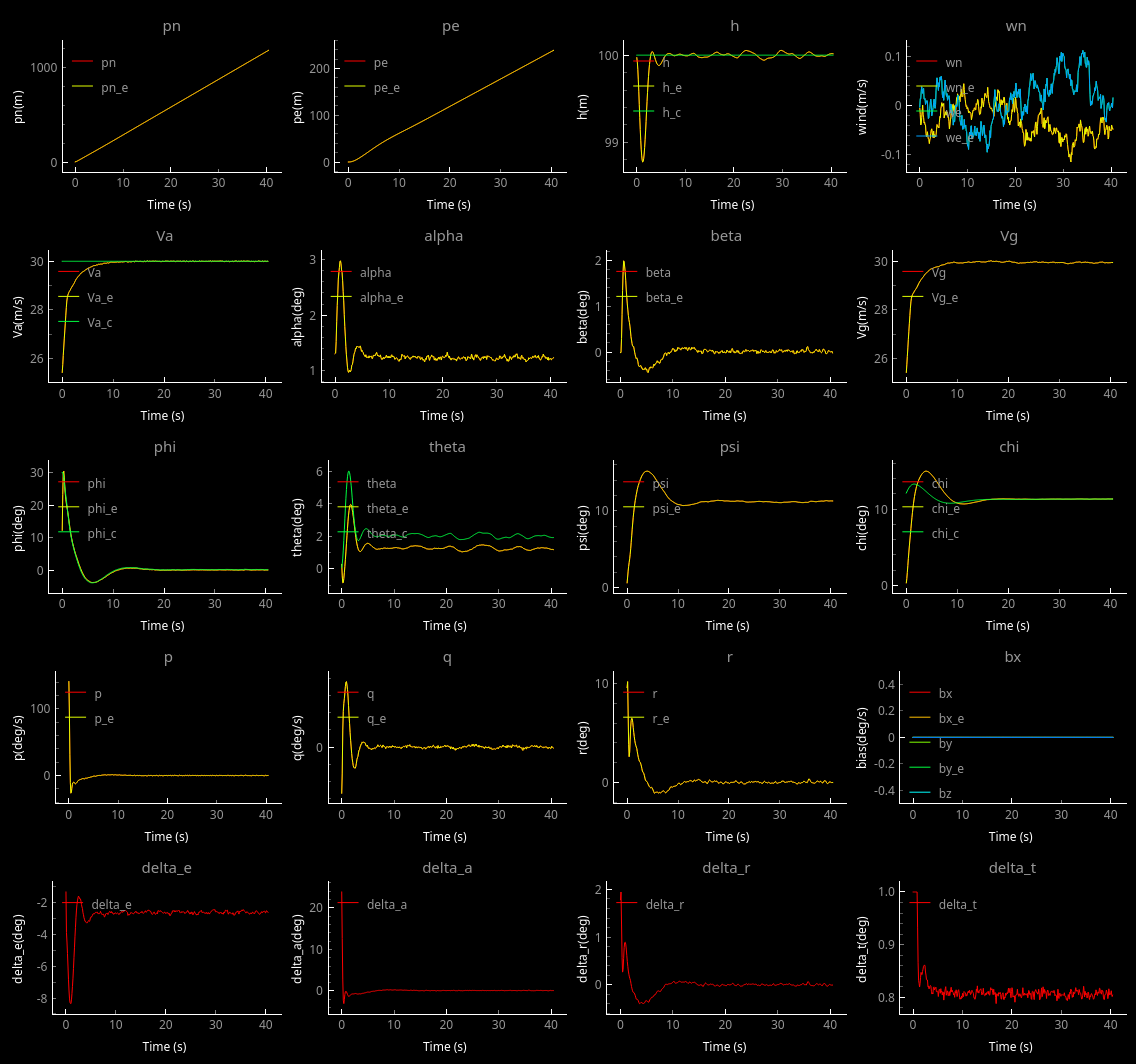

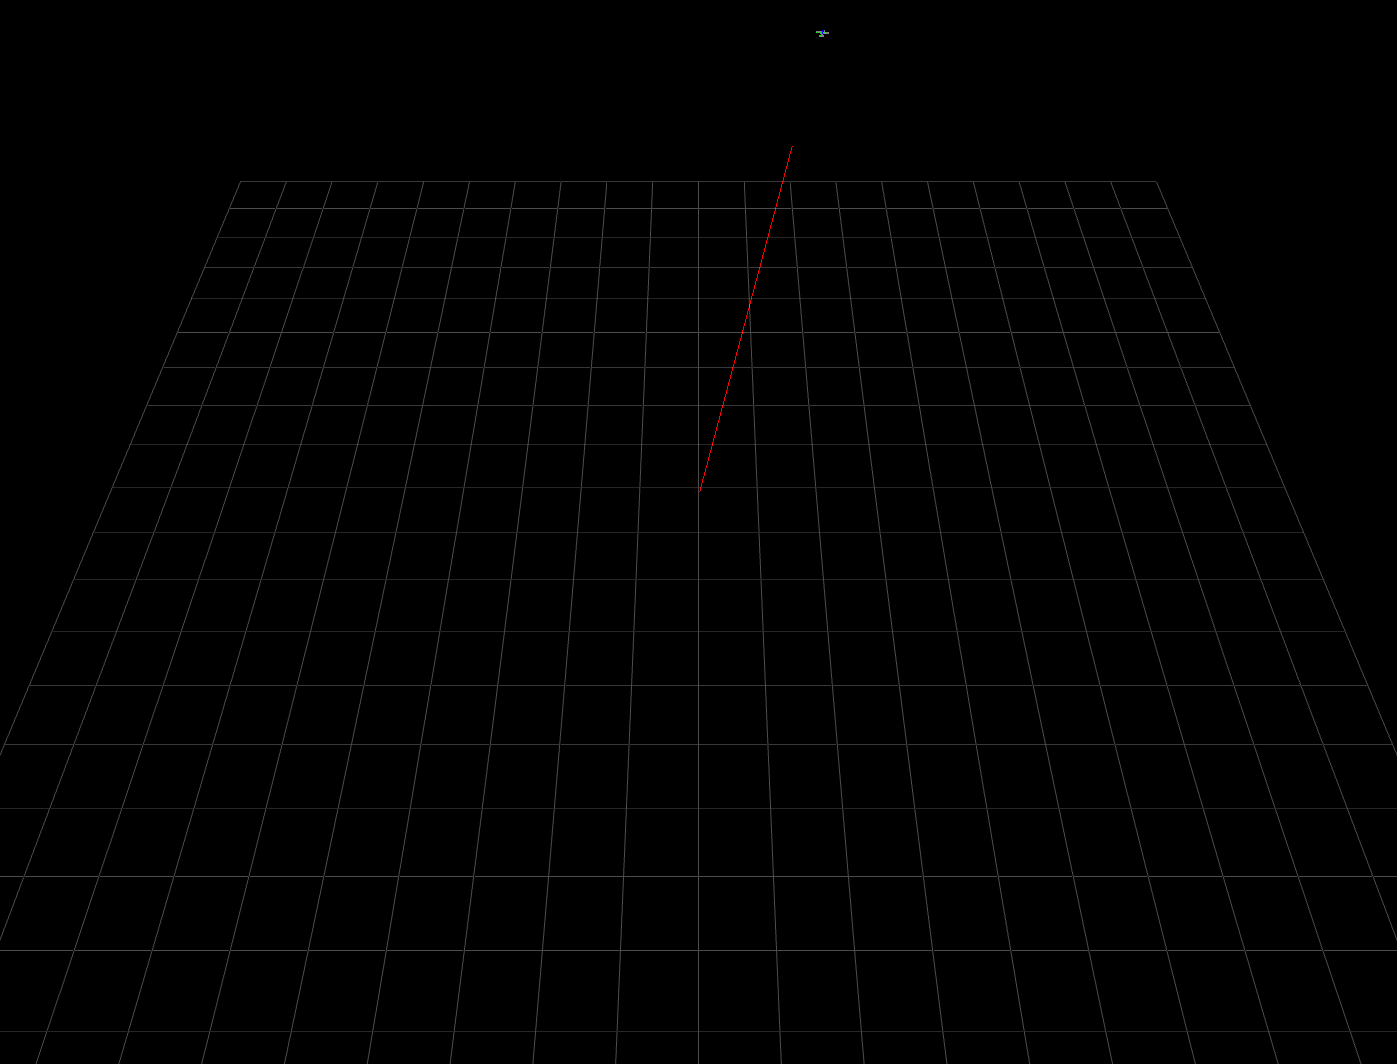

In [4]:
# path definition
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[50.0, 10.0, 0.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 3: Non-Achievable Line Defined Between Points
Control the aircraft to follow a straight line path at 30 m/s where the line is defined by the points $w_0^i = \begin{bmatrix}0 \\ 2 \\ -100 \end{bmatrix}$ and $w_1^i = \begin{bmatrix}100 \\ 200 \\ -200 \end{bmatrix}$

### Describe the results
(Place answer here)

### What do you notice about the z-component of the line direction definition and the ability to track the line?
(Place answer here)

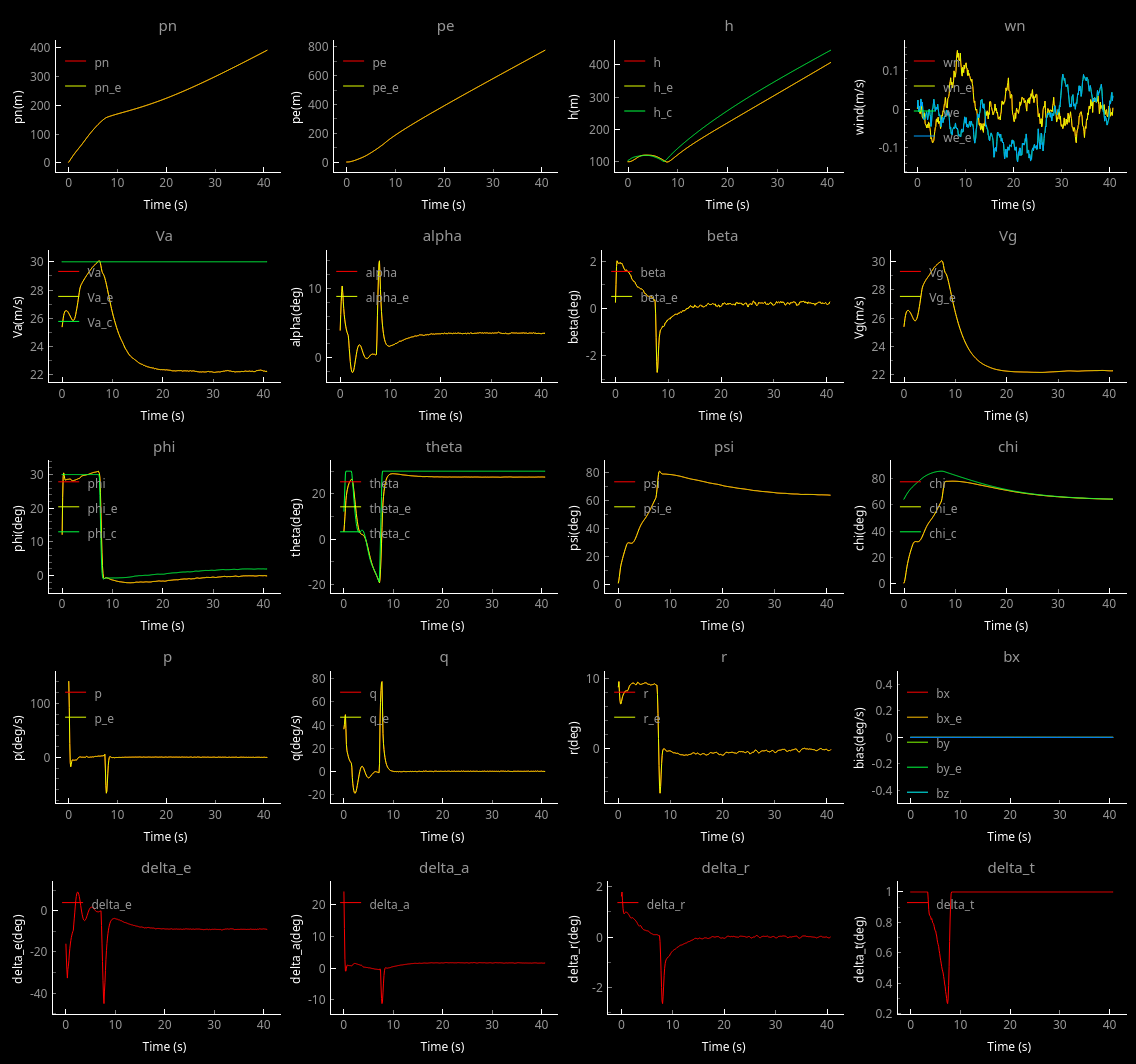

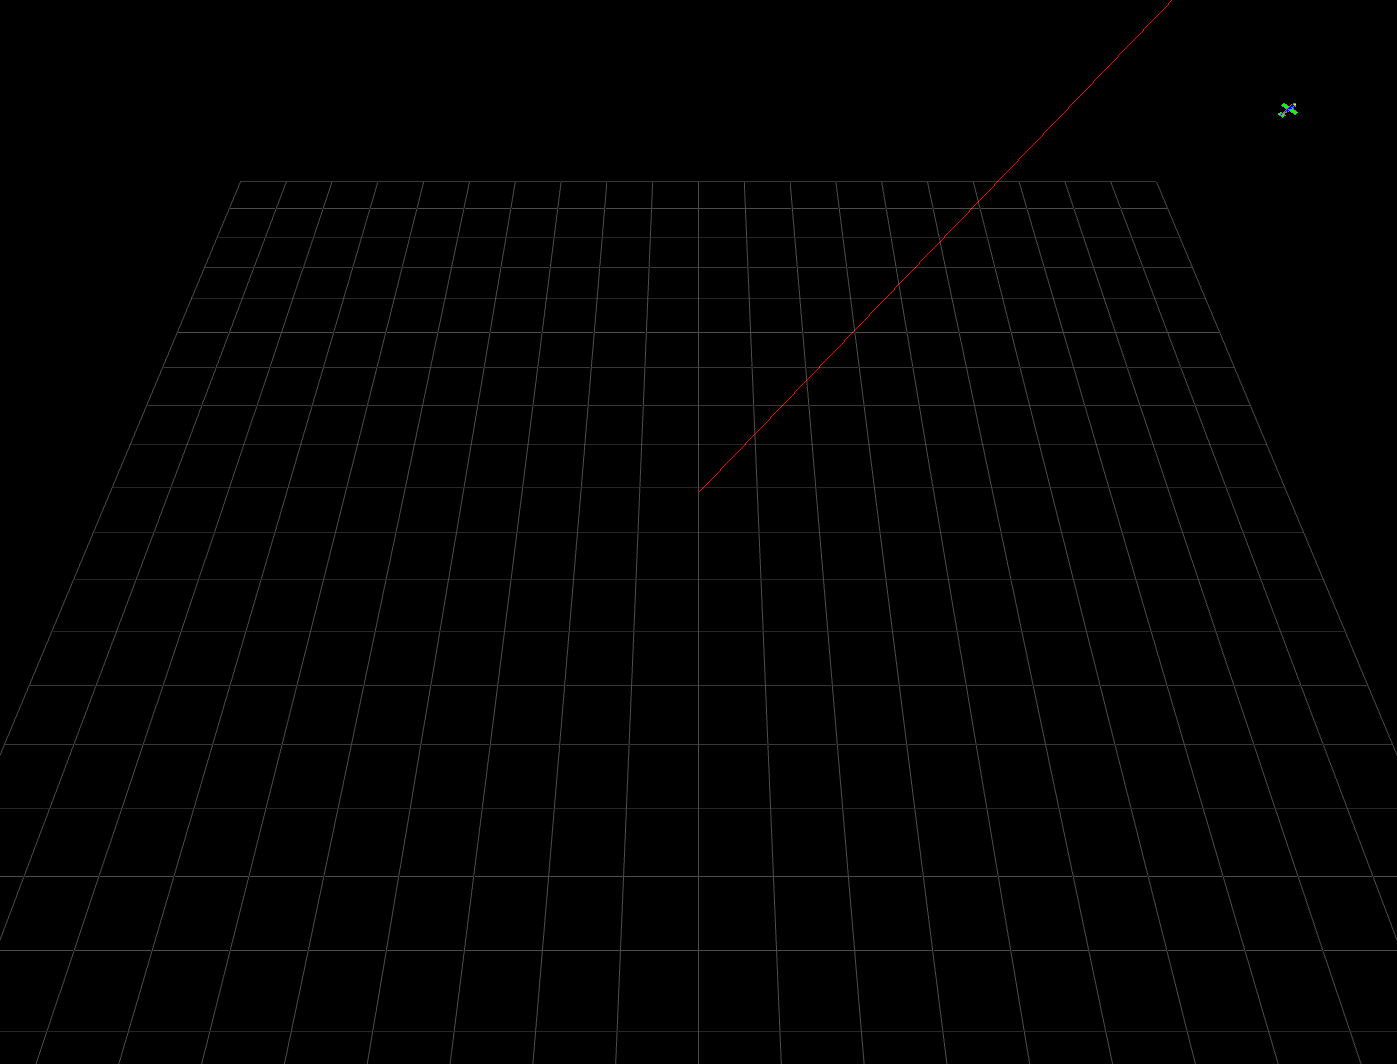

In [5]:
# path definition
path = MsgPath()
path.type = "line"
path.line_origin = np.array([[0.0, 2.0, -100.0]]).T
path.line_direction = np.array([[100, 200, -200]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 4: Trackable Orbit definition
Control the aircraft in a clockwise circular orbit around the point $w_0^i = \begin{bmatrix}400 \\ 200 \\ -100 \end{bmatrix}$ at a radius of 200 meters and airspeed of 25 m/s.

### Describe the results
(Place answer here)



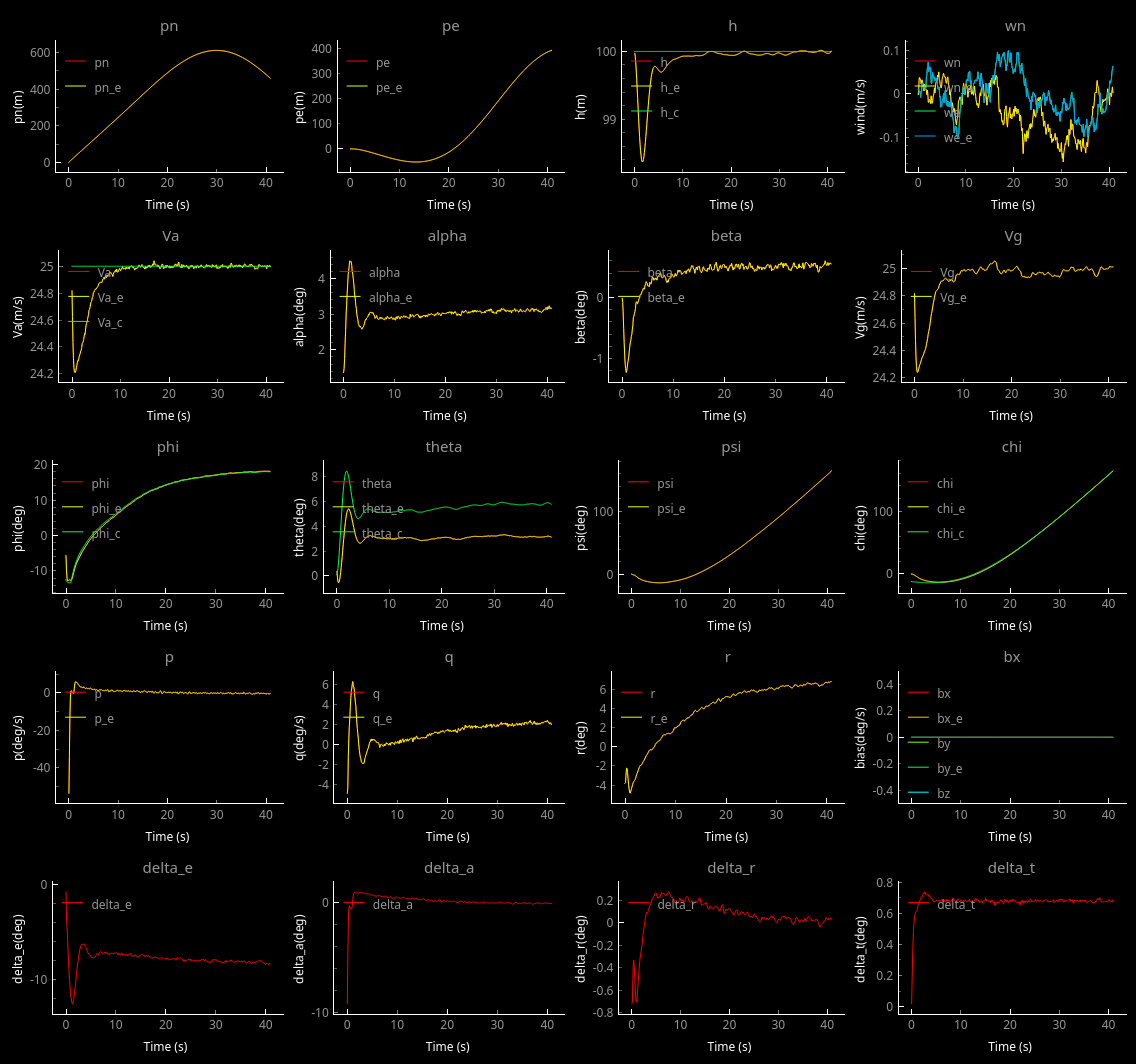

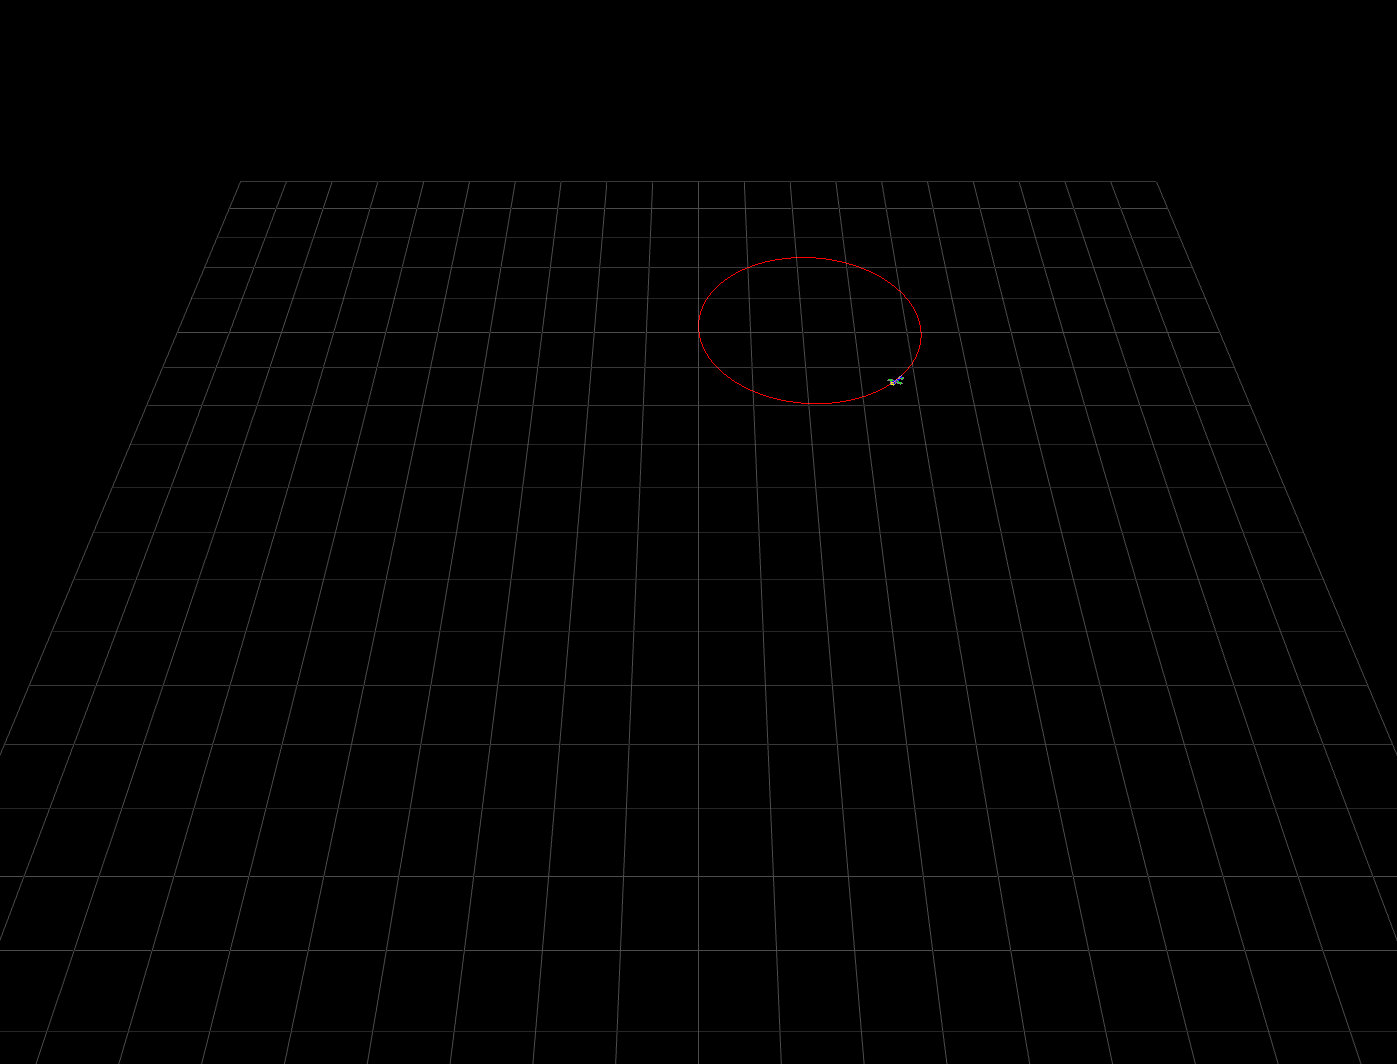

In [6]:
# path definition
path = MsgPath()
path.type = "orbit"
path.orbit_center = np.array([[400, 200, -100.0]]).T  # center of the orbit
path.orbit_radius = 200.0  # radius of the orbit
path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise
path.airspeed=25

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 5: UnTrackable Orbit definition
Control the aircraft in a counter-clockwise circular orbit around the point $w_0^i = \begin{bmatrix}100 \\ -100 \\ -100 \end{bmatrix}$ at a radius of 75 meters and airspeed of 25 m/s.

### Describe the results
(Place answer here)

### What do you notice about the radius and the ability to track the orbit?
(Place answer here)

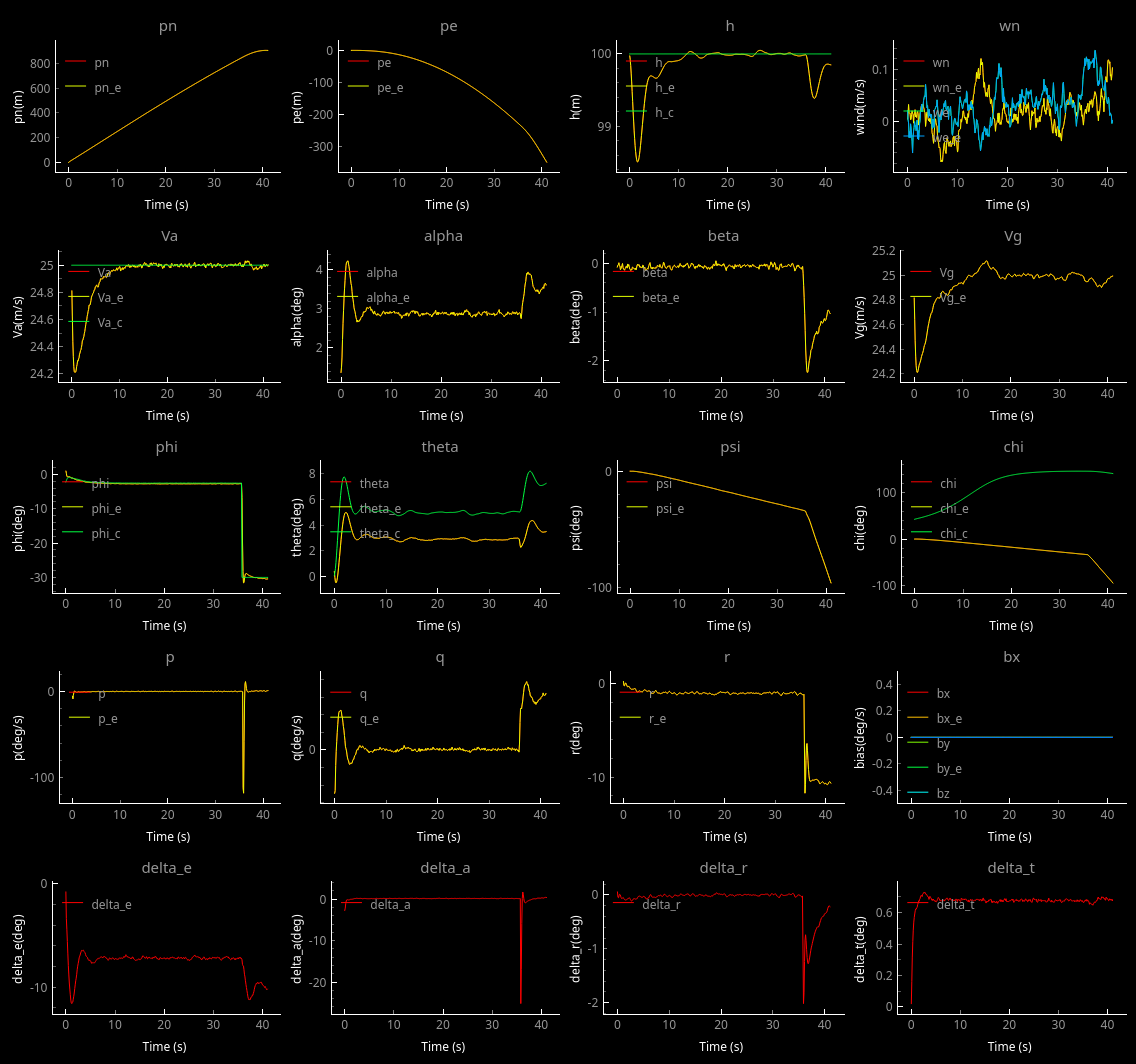

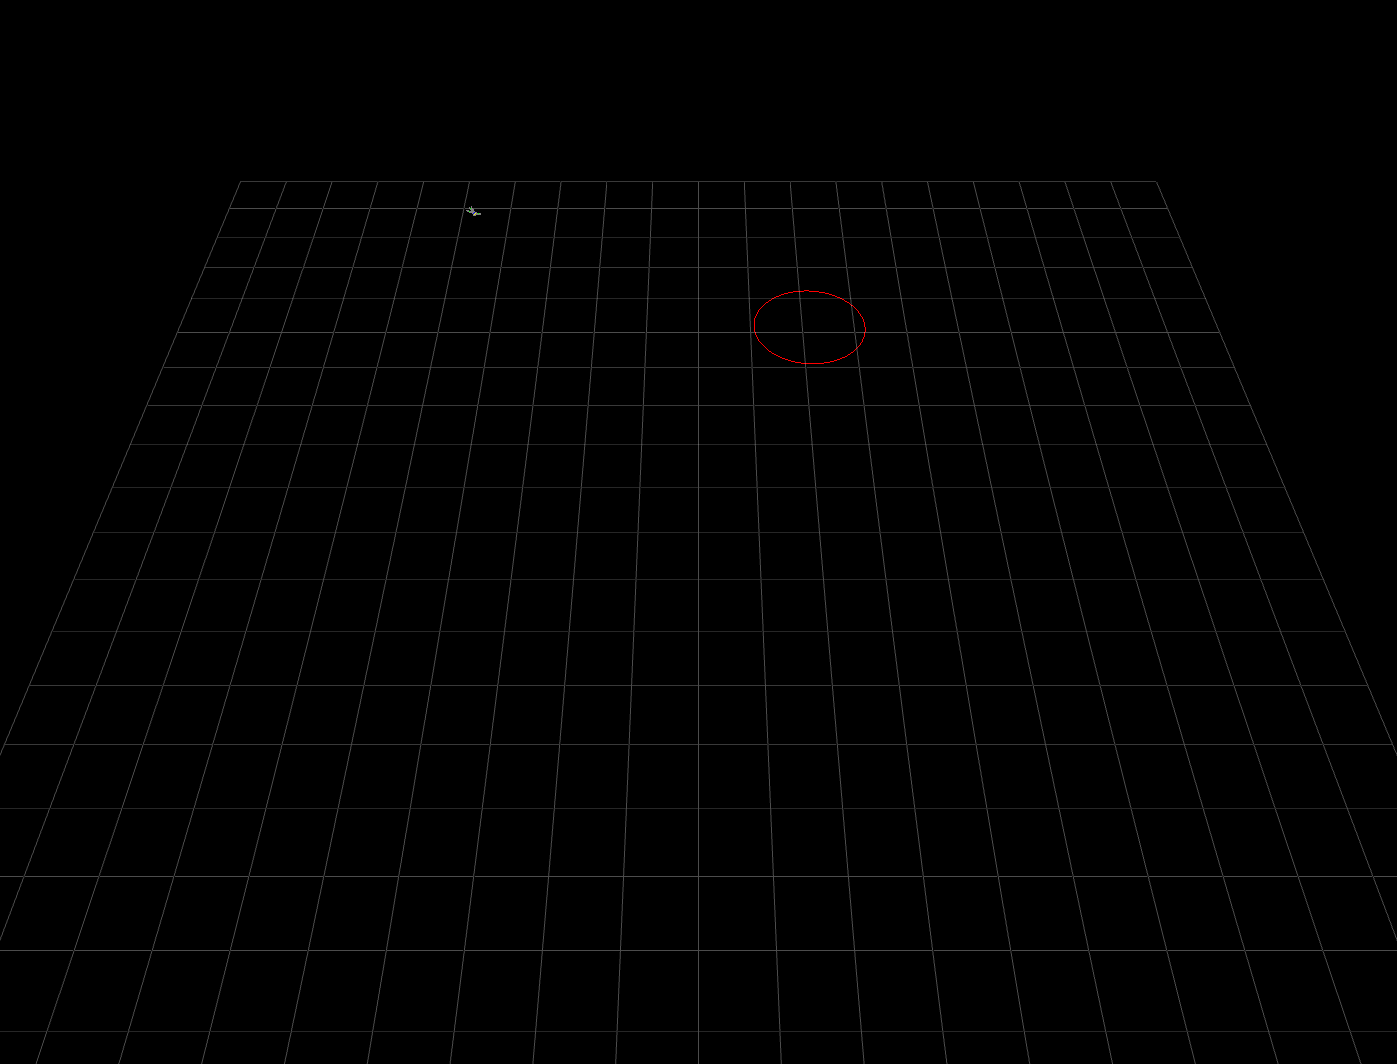

In [7]:
# path definition
path = MsgPath()
path.type = "orbit"
path.orbit_center = np.array([[400, 200, -100.0]]).T  # center of the orbit
path.orbit_radius = 100.0  # radius of the orbit
path.orbit_direction = 'CCW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise
path.airspeed=25

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 6: Switching control with no transition
Control the aircraft at 30 m/s using straight-line paths to move between waypoints $w_0^i = \begin{bmatrix}0 \\ 0 \\ -100 \end{bmatrix}$, $w_1^i = \begin{bmatrix}600 \\ 0 \\ -100 \end{bmatrix}$, $w_2^i = \begin{bmatrix}600 \\ 1 \\ -100 \end{bmatrix}$. Switch from executing linesegment $\overline{w_0 w_1}$ to $\overline{w_1 w_2}$ when the aircraft's north position is greater than or equal to the north position of $w_1^i$.

### Describe the quality of the path following
(Place answer here)


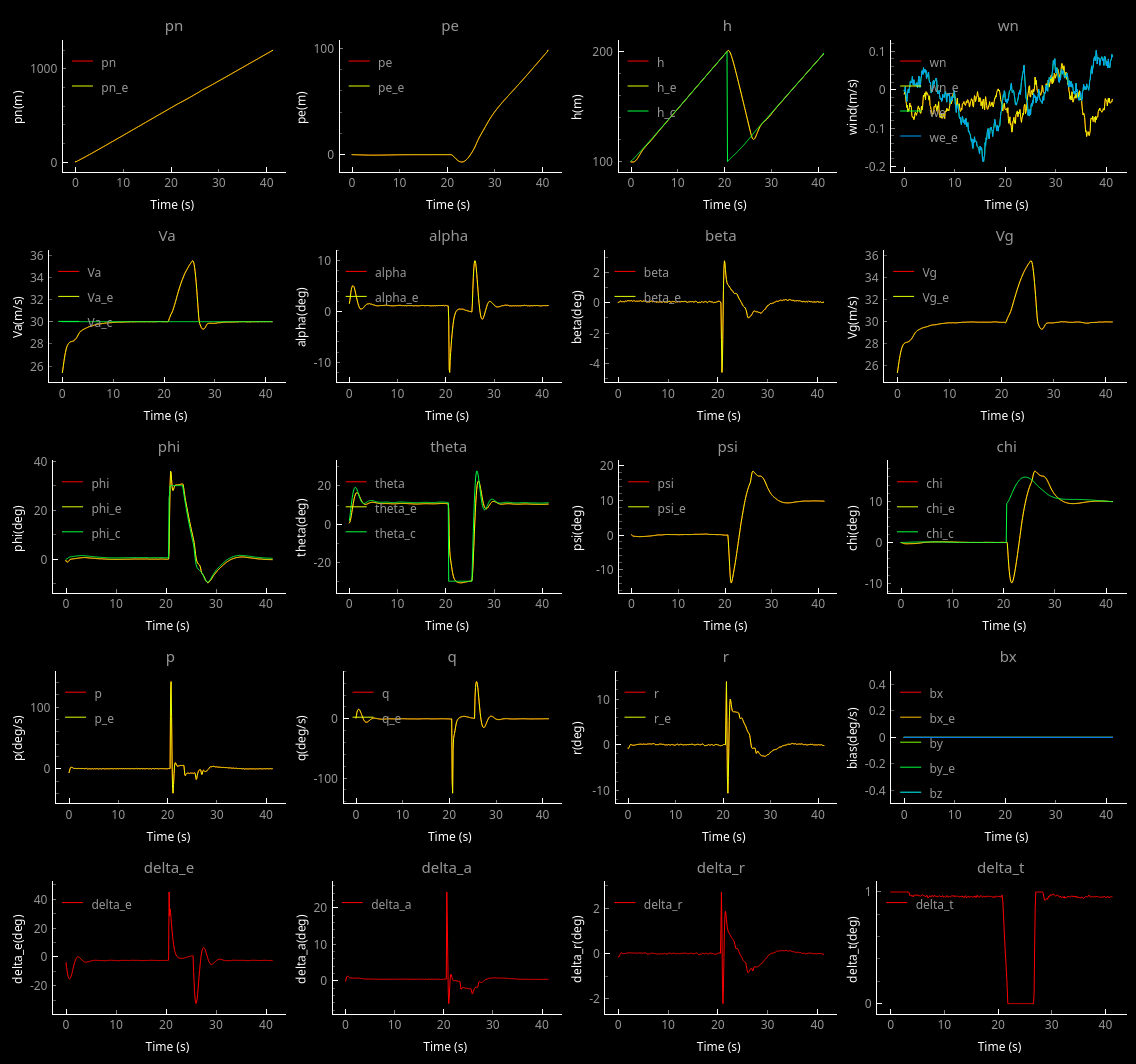

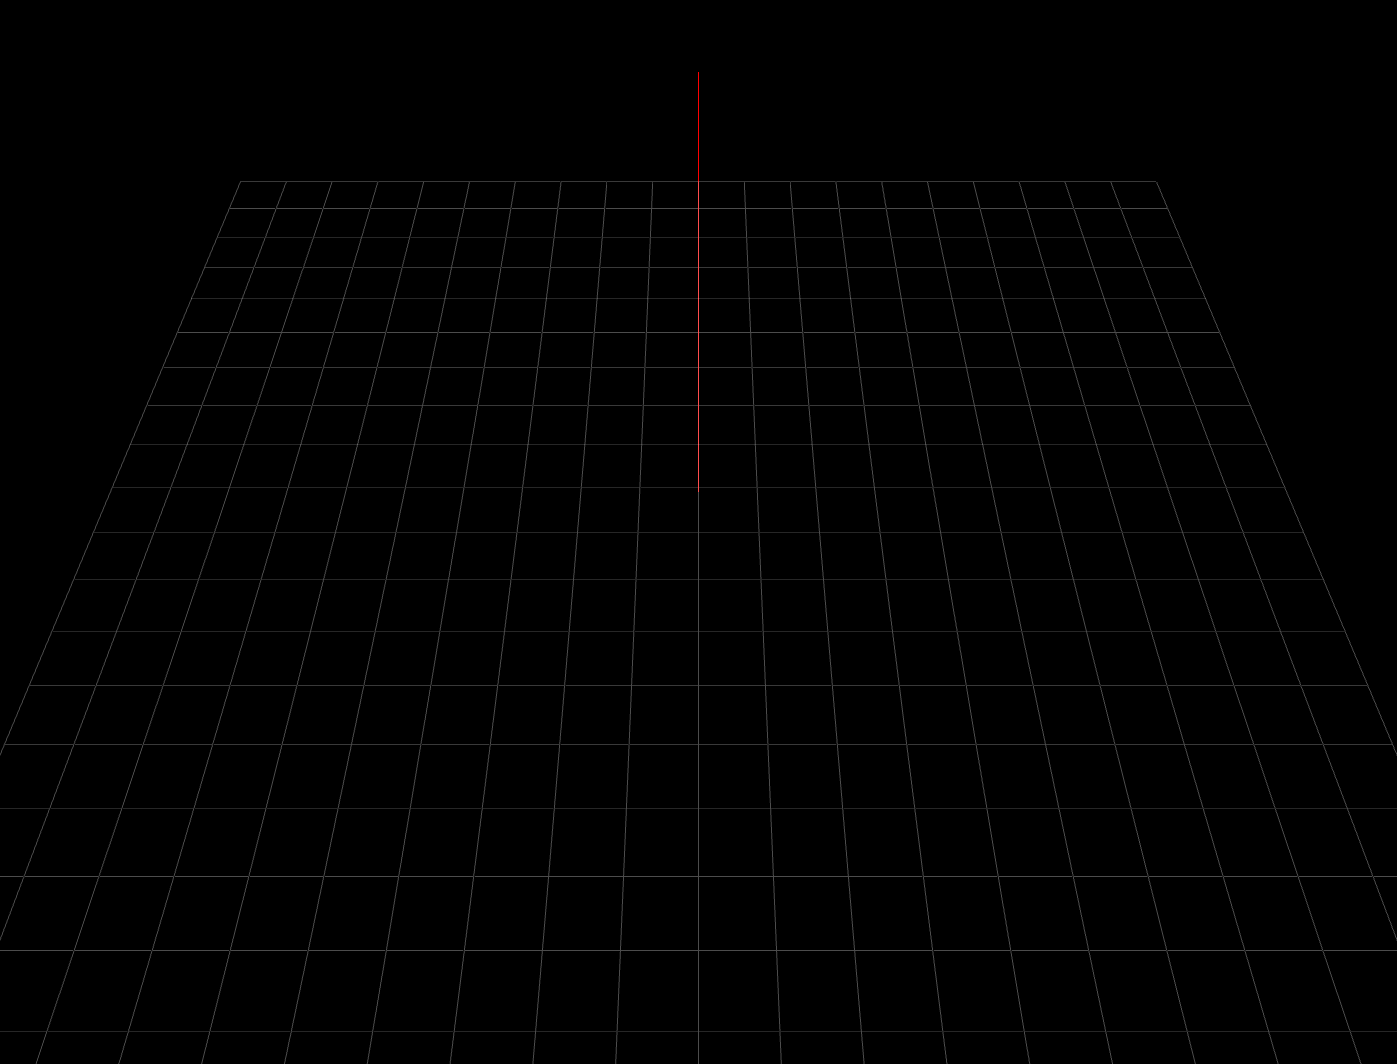

In [8]:
# path definition
path = MsgPath()
path.type           = "line"
path.line_origin    = np.array([[0.0, 0.0, -100.0]]).T
path.line_direction = np.array([[600.0, 0.0, -100.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    p  = np.array([[state.north, state.east, state.altitude]]).T
    w1 = np.array([[600,0,-100]]).T
    w2 = np.array([[600,100,-100]]).T
    
    if (p.item(0) > w1.item(0)):
        path.line_origin    = np.array([[600,0,-100]]).T
        path.line_direction = np.array([[600,100,-100]]).T
        path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)

    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Problem 7: Switching control with arc transition
Repeat problem 6, but instead of having a hard switch between $\overline{w_0 w_1}$ and $\overline{w_1 w_2}$, you will use a circular arc of radius 150 m to perform the switch. Create a circular orbit such that it has exactly one tangent point on $\overline{w_0 w_1}$ and one on $\overline{w_1 w_2}$. Switch to the arc when the aircraft north state has reached the value of the tangent point. Switch from executing the arc to executing $\overline{w_1 w_2}$ when the aircraft east state has reached the value of the tangent point.

### Describe the quality of the path following
(Place answer here)

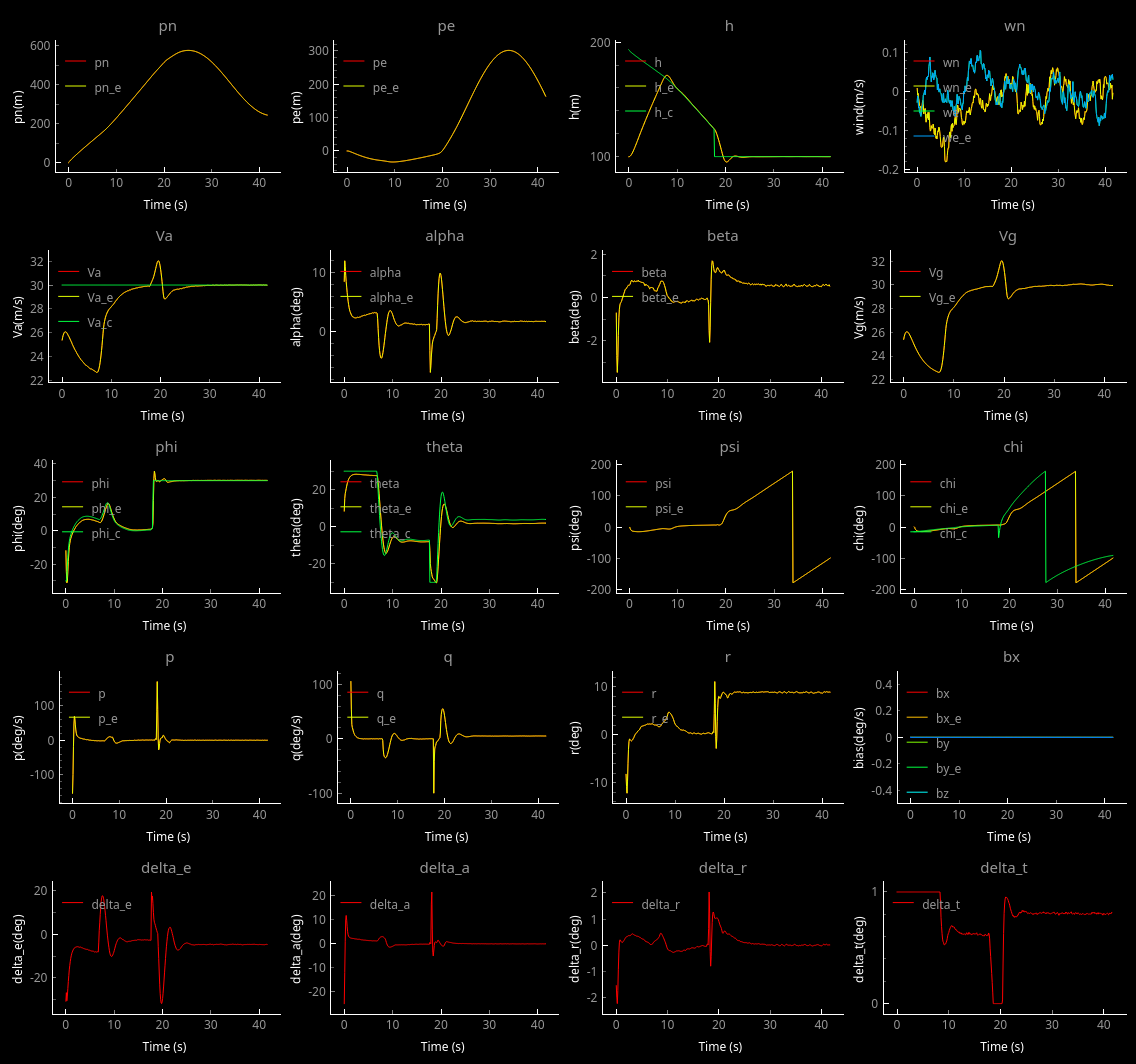

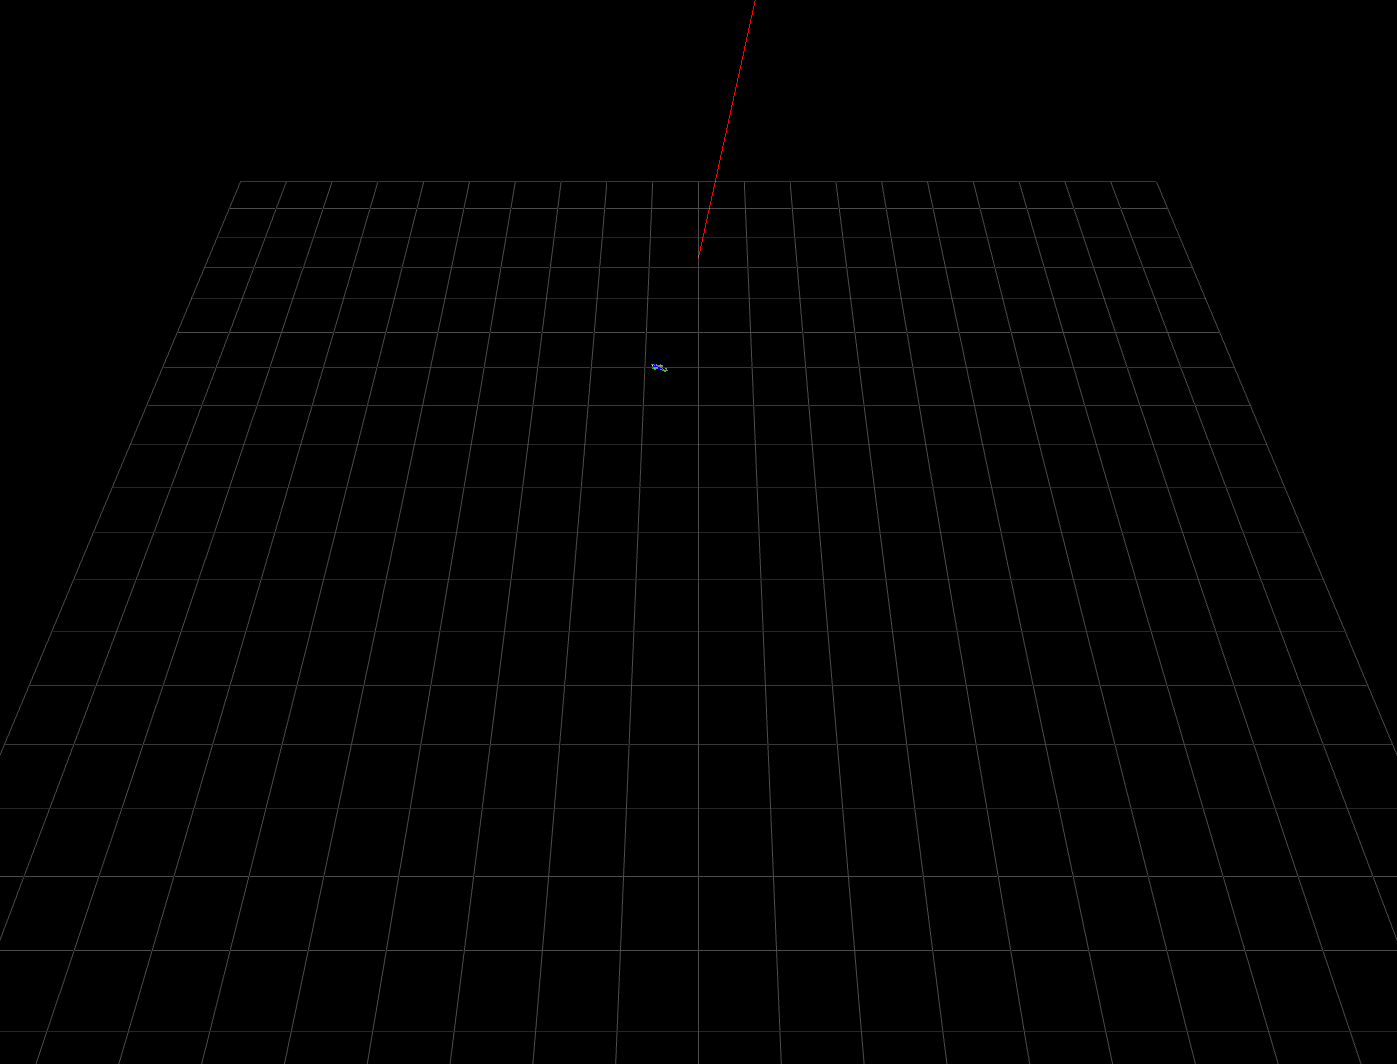

In [11]:
# path definition
path = MsgPath()
path.type           = "line"
path.line_origin    = np.array([[0.0, 0.0, -100.0]]).T
path.line_direction = np.array([[600.0, 0.0, -100.0]]).T
path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
path.airspeed=30

# Constant path function definition
def constant_path(time: float, state: MsgState) -> MsgPath:
    p  = np.array([[state.north, state.east, state.altitude]]).T
    w1 = np.array([[600,0,-100]]).T
    w2 = np.array([[600,100,-100]]).T
    
    if (p.item(1) > w1.item(1)):
        path.line_origin    = np.array([[600,0,-100]]).T
        path.line_direction = np.array([[600,100,-100]]).T
        path.line_direction = path.line_direction / np.linalg.norm(path.line_direction)
    elif (p.item(0) > w1.item(0)-150):
        path.type = "orbit"
        path.orbit_center = np.array([[600.0-150, 0, -100.0]]).T  # center of the orbit
        path.orbit_radius = 150.0  # radius of the orbit
        path.orbit_direction = 'CW'  # orbit direction: 'CW'==clockwise, 'CCW'==counter clockwise

    return path

# Follow path
run_sim_and_display(path_fnc=constant_path)

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [10]:
from mav_sim.unit_tests.ch10_path_follower_test import run_all_tests
run_all_tests()

Starting follow_straight_line test
Failed test!
Calculated output:
[[ 25.        ]
 [ -8.6393798 ]
 [163.63961031]
 [  0.        ]]
Expected output:
[[ 25.       ]
 [ -8.6393798]
 [190.       ]
 [  0.       ]]
Difference:
[[  0.        ]
 [  0.        ]
 [-26.36038969]
 [  0.        ]]
End of test

Starting follow_orbit test
End of test

